# Friendship Goals - HackerEarth Challenge

The task is to build a deep learning model that analyzes an image of a gathering among friends, detects the age group of the gathering, and classifies them into groups of toddlers, teenagers, or adults.\

So the label classes are:

- Toddlers
- Teenagers
- Adults

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import regularizers, applications
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import time
from tensorflow.keras import backend as k
import csv

In [2]:
tf.keras.backend.set_image_data_format('channels_last')

In [3]:
categories = ['Toddler', 'Teenagers', 'Adults']
CLASSES = len(categories)

In [4]:
PATH = 'data'
train_path = os.path.join(PATH, 'train')
IMG_SIZE=224

## Processing Data

In the below cell, we will take images one by one and convert them to numpy array. Then we will append their labels in the last index for each array and append both the things to train_data list

In [5]:
train_data = []

def create_training_data():
    for category in categories:
        print(category)
        path = os.path.join(train_path, category) 
        class_num = categories.index(category)         # Label index
        
        images = sorted(os.listdir(os.path.join(train_path, category)))    # List contains names of imaages in each ds
        for img in images:
            img_path = os.path.join(train_path, category, img)
            try:
                img_array = cv2.imread(img_path ,cv2.COLOR_BGR2RGB)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                train_data.append([new_array, class_num])  # add this to our training_data
    
            except Exception as e:
                print(e)
                pass
  
        random.shuffle(train_data)


create_training_data()

len(train_data)

Toddler
Teenagers
Adults
OpenCV(4.3.0) ..\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



2803

Seperating the features and labels. We will reshape the features to make it flat

In [6]:
X = []
y = []

for features, label in train_data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)
X.shape

(2803, 224, 224, 3)

Lets take a loot at our images

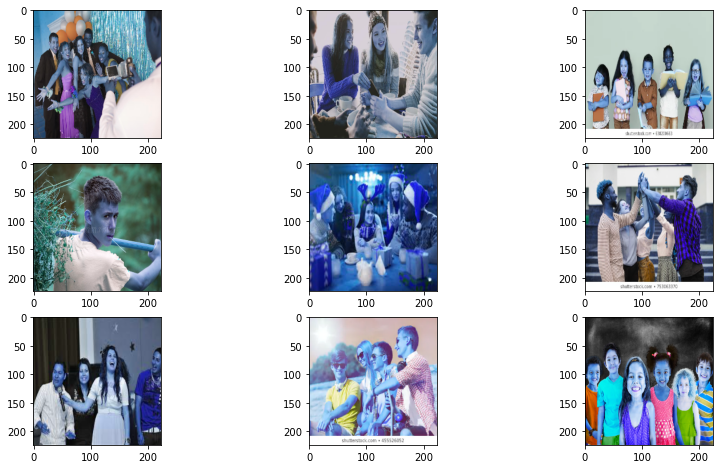

In [7]:
w=60
h=40

fig=plt.figure(figsize=(14, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = X[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Save Features and labels

In [8]:
np.save('features', X, allow_pickle=True, fix_imports=True)
np.save('labels', y, allow_pickle=True, fix_imports=True)